In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save " Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ml-lab2/Lab Session Data.xlsx


In [41]:
df_cases = pd.read_csv("https://api.vitaldb.net/cases")  # clinical information
df_trks = pd.read_csv("https://api.vitaldb.net/trks")  # track list
df_labs = pd.read_csv('https://api.vitaldb.net/labs')  # laboratory results

A1. Write your own functions for the following modules:

a) Summation unit

b) Activation Unit – Step, Bipolar Step, Sigmoid, TanH, ReLU and Leaky ReLU functions

c) Comparator unit for Error calculation

In [42]:
import matplotlib.pyplot as plt

In [43]:
def summation_unit(inputs,weights,bias):
    return np.dot(inputs,weights)+bias
def activation_unit(x,function="relu",threshold=0):
    if function is None:
        return x
    if function=="step":
        return 1 if x>=0 else 0
    if function=="bipolar_step":
        return 1 if x>= threshold else -1
    if function=="sigmoid":
        return 1/(1+pow(np.e,-x))
    if function=="tanh":
        return np.tanh(x)
    if function=="relu":
        return max(0,x)
    if function=="leaky_relu":
        return max(0.1*x,x)
def mse(y_pred,y_valid):
    return np.mean(np.square(y_valid-y_pred))
def sse(error):
    ans= 0
    mean=np.mean(error)
    for i in error:
        ans=+ (i-mean)**2
    return ans

A2. Develop the above perceptron in your own code (don’t use the perceptron model available from 
package). Use the initial weights as provided below.

W0 = 10, W1 = 0.2, w2 = -0.75, learning rate (α) = 0.05

Write a function for Activation function. Develop " Use the code for Step activation function to learn 
the weights of the network to implement above provided AND gate logic. The activation function is 
demonstrated below.

Identify the number of epochs needed for the weights to converge in the learning process. Make a 
plot of the epochs against the error values calculated (after each epoch, calculate the sum-squareerror against all training samples). 

(Note: Learning is said to be converged if the error is less than or equal to 0.002. Stop the learning 
after 1000 iterations if the convergence error condition is not met.)

In [44]:
def train(inputs,weights,bias,targets,act_function=None,learning_rate = 0.05, max_epochs=1000, conv_error=0.002,ret_weights=False):
    errors = []  
    for epoch in range(max_epochs):
      total_error = 0
      for i in range(len(inputs)):
        pred = activation_unit(summation_unit(inputs[i],weights,bias),function=act_function)
        error = targets[i] - pred
        weights += learning_rate * error * inputs[i]
        bias += learning_rate*error
        total_error += error**2
      errors.append(total_error)
      if total_error <= conv_error:
        if ret_weights:
            return errors,weights
        return  errors
    if ret_weights:
        return errors,weights
    return errors

In [45]:
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 0, 0, 1])  
weights = np.array([0.2, -0.75])
errors=train(inputs,weights,10,targets,act_function="step")

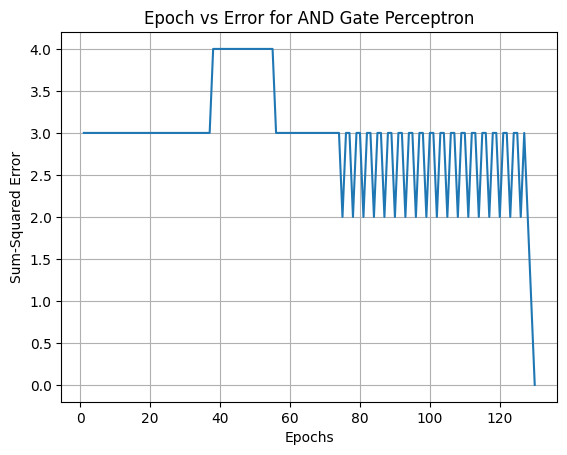

In [46]:
plt.plot(range(1, len (errors) + 1), errors)
plt.xlabel("Epochs")
plt.ylabel("Sum-Squared Error")
plt.title("Epoch vs Error for AND Gate Perceptron")
plt.grid(True)
plt.show()

A3. Repeat the above A1 experiment with following activation functions (write your own code for 
activation functions). Compare the iterations taken to converge against each of the activation 
functions. Keep the learning rate same as A1.

• Bi-Polar Step function

• Sigmoid function

• ReLU function

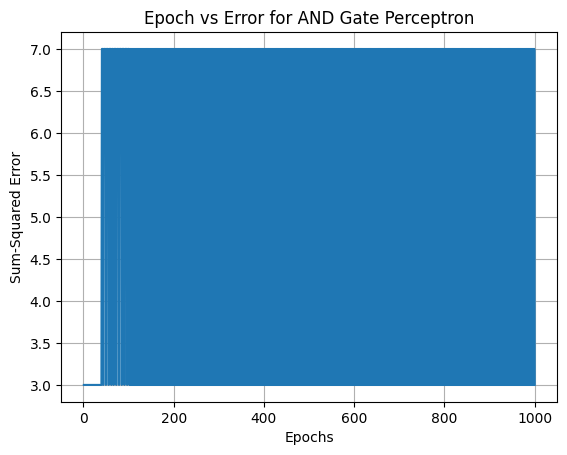

In [47]:
errors=train(inputs,weights,10,targets,act_function="bipolar_step")
plt.plot(range(1, len (errors) + 1), errors)
plt.xlabel("Epochs")
plt.ylabel("Sum-Squared Error")
plt.title("Epoch vs Error for AND Gate Perceptron")
plt.grid(True)
plt.show()

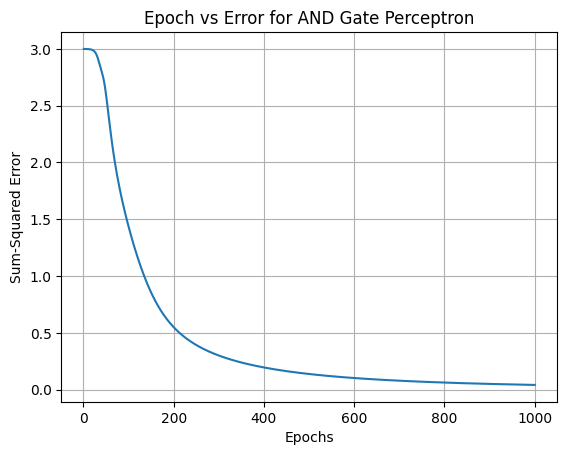

In [48]:
errors=train(inputs,weights,10,targets,act_function="sigmoid")
plt.plot(range(1, len (errors) + 1), errors)
plt.xlabel("Epochs")
plt.ylabel("Sum-Squared Error")
plt.title("Epoch vs Error for AND Gate Perceptron")
plt.grid(True)
plt.show()

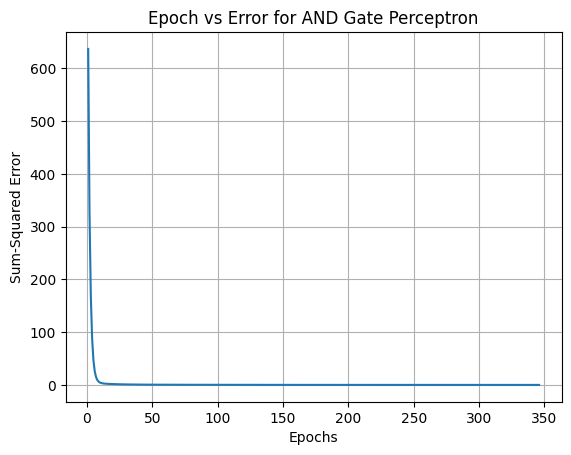

In [49]:
errors=train(inputs,weights,10,targets,act_function="relu")
plt.plot(range(1, len (errors) + 1), errors)
plt.xlabel("Epochs")
plt.ylabel("Sum-Squared Error")
plt.title("Epoch vs Error for AND Gate Perceptron")
plt.grid(True)
plt.show()

A4. Repeat exercise A1 with varying the learning rate, keeping the initial weights same. 

Take learning rate = {0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1}. 

Make a plot of the number of iterations taken for learning to converge against the learning rates.

In [50]:
learning_rate = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
epochs=[]
for i in learning_rate:
    errors=train(inputs,weights,10,targets,act_function="relu",learning_rate=i)
    epochs.append(len(errors))

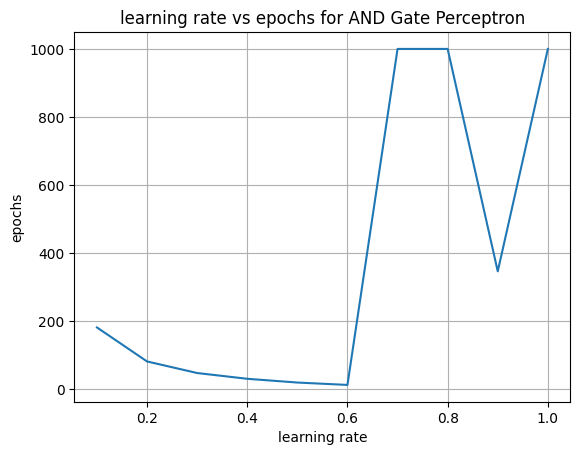

In [51]:
plt.plot(learning_rate,epochs)
plt.xlabel("learning rate")
plt.ylabel("epochs")
plt.title("learning rate vs epochs for AND Gate Perceptron")
plt.grid(True)
plt.show()

A5. Repeat the above exercises, A1 to A3, for XOR gate logic.

In [52]:
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 1, 0, 0])  
weights = np.array([0.2, -0.75])
errors=train(inputs,weights,10,targets,act_function="step")

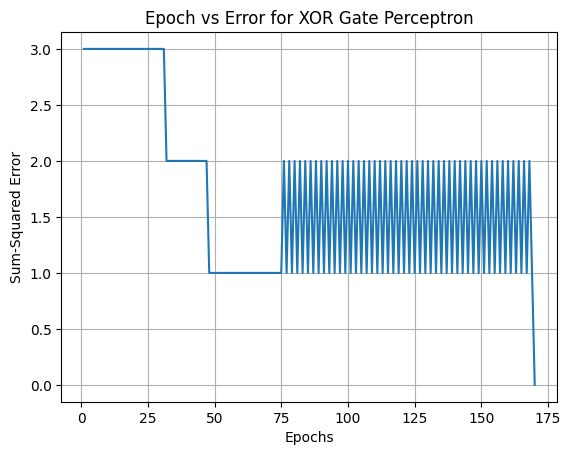

In [53]:
plt.plot(range(1, len (errors) + 1), errors)
plt.xlabel("Epochs")
plt.ylabel("Sum-Squared Error")
plt.title("Epoch vs Error for XOR Gate Perceptron")
plt.grid(True)
plt.show()

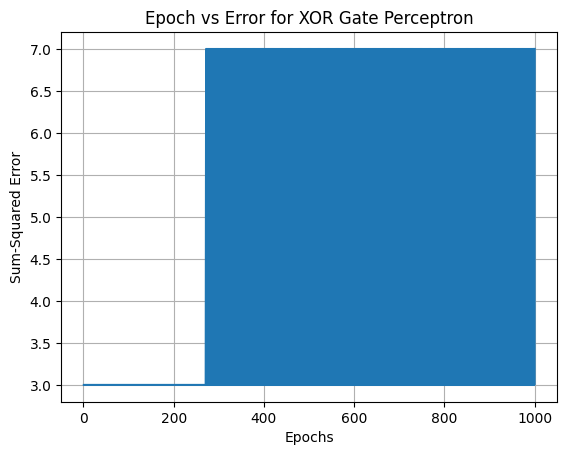

In [54]:
errors=train(inputs,weights,10,targets,act_function="bipolar_step")
plt.plot(range(1, len (errors) + 1), errors)
plt.xlabel("Epochs")
plt.ylabel("Sum-Squared Error")
plt.title("Epoch vs Error for XOR Gate Perceptron")
plt.grid(True)
plt.show()

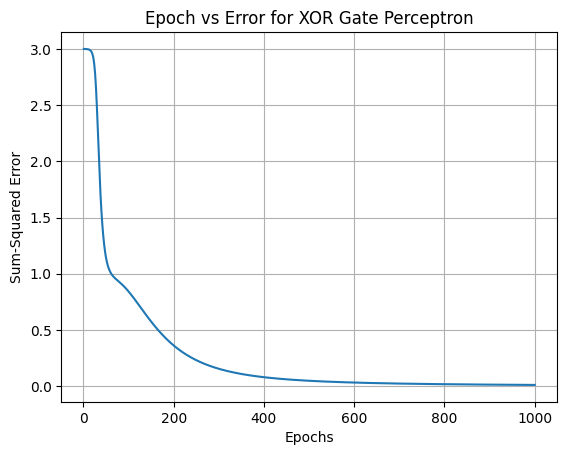

In [55]:
errors=train(inputs,weights,10,targets,act_function="sigmoid")
plt.plot(range(1, len (errors) + 1), errors)
plt.xlabel("Epochs")
plt.ylabel("Sum-Squared Error")
plt.title("Epoch vs Error for XOR Gate Perceptron")
plt.grid(True)
plt.show()

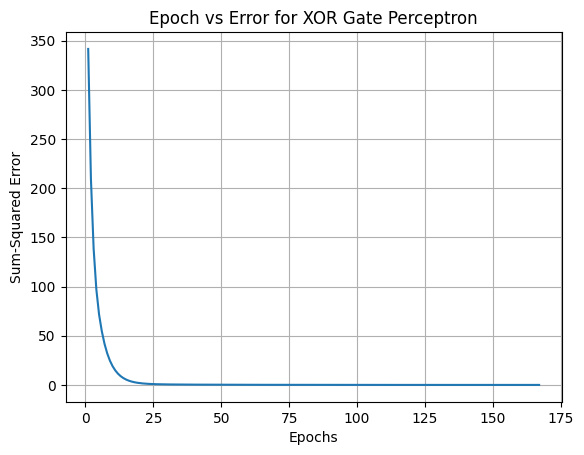

In [56]:
errors=train(inputs,weights,10,targets,act_function="relu")
plt.plot(range(1, len (errors) + 1), errors)
plt.xlabel("Epochs")
plt.ylabel("Sum-Squared Error")
plt.title("Epoch vs Error for XOR Gate Perceptron")
plt.grid(True)
plt.show()

A6. Use customer data provided below. Build a perceptron " learn to classify the transactions as 
high or low value as provided in the below table. Use sigmoid as the activation function. Initialize the 
weights " learning rate with your choice.

In [57]:
xls = pd.ExcelFile("/kaggle/input/ml-lab2/Lab Session Data.xlsx")
df = pd.read_excel(xls,sheet_name=0)
df=df.iloc[:,[i for i in range(0,5)]]

In [58]:
df

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs)
0,C_1,20,6,2,386
1,C_2,16,3,6,289
2,C_3,27,6,2,393
3,C_4,19,1,2,110
4,C_5,24,4,2,280
5,C_6,22,1,5,167
6,C_7,15,4,2,271
7,C_8,18,4,2,274
8,C_9,21,1,4,148
9,C_10,16,2,4,198


In [59]:
df["High Value"] = [1,1,1,0,1,0,1,1,0,0]

In [60]:
inputs = np.array([df.iloc[:,i].to_numpy() for i in range(1,5)]).T

In [61]:
targets = df.iloc[:,-1].to_numpy()

In [62]:
weights = np.random.rand(4)  

In [63]:
errors,weights=train(inputs,weights,10,targets,act_function="sigmoid",ret_weights=True)

/tmp/ipykernel_36/478177580.py:11: RuntimeWarning: overflow encountered in scalar power
  return 1/(1+pow(np.e,-x))


In [64]:
for i in inputs:
    ans = summation_unit(i,weights,0)
    print(activation_unit(ans,function="step"))

1
1
1
0
1
0
1
1
0
0


A7. Compare the results obtained from above perceptron learning to the ones obtained with matrix pseudo-inverse.

In [65]:
inputs_with_bias = np.c_[inputs, np.ones(inputs.shape[0])]

# Calculate the pseudo-inverse
weights_pinv = np.linalg.pinv(inputs_with_bias).dot(targets)

# Extract weights and bias
weights_pinv = weights_pinv[:-1]
bias_pinv = weights_pinv[-1]


In [66]:
for i in inputs:
    print(activation_unit(np.dot(i,weights_pinv)+bias_pinv,function="step"))

1
1
1
0
1
0
1
1
0
1


A8. Develop the below Neural Network. Use learning rate (α) = 0.05 with a Sigmoid activation function. Learn the weights of the network using back-propagation algorithm to implement above provided AND gate logic. 

In [67]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        # Initialize weights
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)

        # Initialize the biases
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.bias_output = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def feedforward(self, X):
        # Input to hidden
        self.hidden_activation = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_activation)

        # Hidden to output
        self.output_activation = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.predicted_output = self.sigmoid(self.output_activation)

        return self.predicted_output

    def backward(self, X, y, learning_rate):
        # Compute the output layer error
        output_error = y - self.predicted_output
        output_delta = output_error * self.sigmoid_derivative(self.predicted_output)


        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)


        self.weights_hidden_output += np.dot(self.hidden_output.T, output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += np.dot(X.T, hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate,conv=0.2):
        for epoch in range(epochs):
            output = self.feedforward(X)
            self.backward(X, y, learning_rate)
            loss = np.mean(np.square(y - output))
            if conv>loss:
                break
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
nn.train(X, y, epochs=1000, learning_rate=0.1,conv=0.002)

output  = nn.feedforward(X)
print(output)

[[0.0164724 ]
 [0.14810568]
 [0.19707461]
 [0.74404274]]


A9. Repeat the above A1 experiment for XOR Gate logic. Keep the learning rate & activation function 
same as A1.

In [68]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
nn.train(X, y, epochs=1000, learning_rate=0.1,conv=0.002)
output  = nn.feedforward(X)
print(output)

[[0.412491  ]
 [0.63622762]
 [0.40887529]
 [0.46362121]]


A10. Repeat exercise A1 & A2 with 2 output nodes (as shown below). A zero output of logic gate 
maps to [O1 O2] = [1 0] from output layer while a one output from logic gate maps to [0 1].

In [69]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=2)
nn.train(X, y, epochs=1000, learning_rate=0.05,conv=0.002)
output  = nn.feedforward(X)
print(output)

[[0.52057041 0.49019107]
 [0.49492562 0.50503079]
 [0.51823414 0.48974075]
 [0.45585716 0.50190401]]


A11. Learn using a MLP network from Sci-Kit manual available at https://scikitlearn.org/stable/modules/neural_networks_supervised.html. Repeat the AND Gate and XOR Gate 
exercises using MLPClassifier() function.


In [70]:
from sklearn.neural_network import MLPClassifier

X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])


mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='lbfgs', max_iter=1000)

mlp.fit(X_and, y_and)

print("AND Gate Predictions:")
for i in range(len(X_and)):
  prediction = mlp.predict([X_and[i]])[0]
  print(f"Input: {X_and[i]}, Target: {y_and[i]}, Prediction: {prediction}")


X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])


mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='lbfgs', max_iter=1000)


mlp.fit(X_xor, y_xor)
print("\nXOR Gate Predictions:")
for i in range(len(X_xor)):
  prediction = mlp.predict([X_xor[i]])[0]
  print(f"Input: {X_xor[i]}, Target: {y_xor[i]}, Prediction: {prediction}")

AND Gate Predictions:
Input: [0 0], Target: 0, Prediction: 0
Input: [0 1], Target: 0, Prediction: 0
Input: [1 0], Target: 0, Prediction: 0
Input: [1 1], Target: 1, Prediction: 1

XOR Gate Predictions:
Input: [0 0], Target: 0, Prediction: 0
Input: [0 1], Target: 1, Prediction: 1
Input: [1 0], Target: 1, Prediction: 1
Input: [1 1], Target: 0, Prediction: 0


In [71]:
df_cases.columns

Index(['caseid', 'subjectid', 'casestart', 'caseend', 'anestart', 'aneend',
       'opstart', 'opend', 'adm', 'dis', 'icu_days', 'death_inhosp', 'age',
       'sex', 'height', 'weight', 'bmi', 'asa', 'emop', 'department', 'optype',
       'dx', 'opname', 'approach', 'position', 'ane_type', 'preop_htn',
       'preop_dm', 'preop_ecg', 'preop_pft', 'preop_hb', 'preop_plt',
       'preop_pt', 'preop_aptt', 'preop_na', 'preop_k', 'preop_gluc',
       'preop_alb', 'preop_ast', 'preop_alt', 'preop_bun', 'preop_cr',
       'preop_ph', 'preop_hco3', 'preop_be', 'preop_pao2', 'preop_paco2',
       'preop_sao2', 'cormack', 'airway', 'tubesize', 'dltubesize', 'lmasize',
       'iv1', 'iv2', 'aline1', 'aline2', 'cline1', 'cline2', 'intraop_ebl',
       'intraop_uo', 'intraop_rbc', 'intraop_ffp', 'intraop_crystalloid',
       'intraop_colloid', 'intraop_ppf', 'intraop_mdz', 'intraop_ftn',
       'intraop_rocu', 'intraop_vecu', 'intraop_eph', 'intraop_phe',
       'intraop_epi', 'intraop_ca'],
     

In [72]:
df_cases["bmi"].values

array([26.3, 19.6, 24.4, ..., 18.8, 22.9, 22.9])

In [78]:
y

array([26.3, 19.6, 24.4, ..., 18.8, 22.9, 22.9])

In [77]:
y_xor

array([0, 1, 1, 0])

In [85]:
height = df_cases["height"].values
weight = df_cases["weight"].values
bmi = df_cases["bmi"].values
X = np.array([[y,x] for x,y in zip(height,weight)])
y = np.array([i for i in bmi])
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='lbfgs', max_iter=1000)
y = y.astype('int')
mlp.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=1000,
              solver='lbfgs')